In [1]:
%matplotlib inline

from __future__ import annotations

import math
from typing import Any

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.markers as markers
import pandas
import numpy
import seaborn

from matplotlib.ticker import ScalarFormatter

# to change default colormap
plt.rcParams["image.cmap"] = "tab10"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

In [2]:
NODES = [8, 128, 256, 512, 1024]
DATA = {
    'Baseline': {
        'CPU': [0.8534113322726474, 0.741658462870173, 0.7701789655961045, 0.5167485246840038, 0.33938224057120914],
        'GPU': [0.6598946671859001, 0.5806051617037058, 0.6777844457057892, 0.6625159614046943, 0.6685209312655067], 
    },
    'ProxyStore': {
        'CPU': [0.8942408568979279, 0.7934664609952449, 0.7505511452293577, 0.668794907750314, 0.40581564940832815],
        'GPU': [0.7960034471860041, 0.779675514360612, 0.7902134736663917, 0.632301108687265, 0.697184791650481],
    }
}

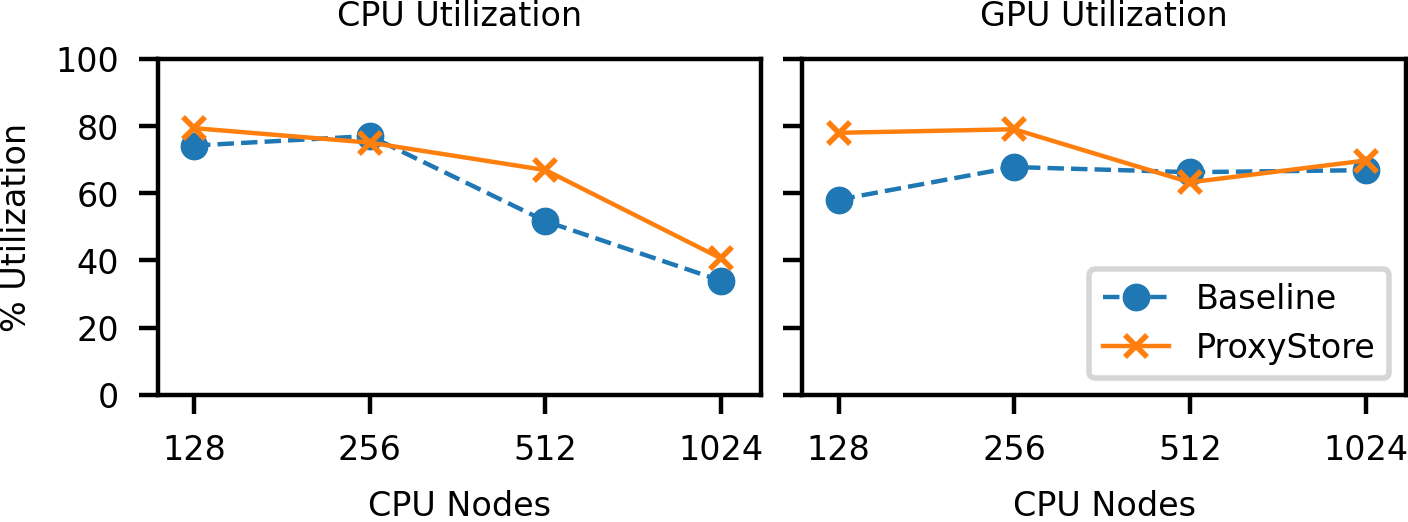

In [3]:
MARKERS = ('o', 'x')
LINES = ('--', '-')
cmap = plt.get_cmap()

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

DROP_EIGHT = True

for i, (config, tasks) in enumerate(DATA.items()):
    for j, (system, utils) in enumerate(tasks.items()):
        # utils = [u * 100 for u in utils]
        if DROP_EIGHT:
            utils = utils[1:]
        x = NODES[int(DROP_EIGHT):int(DROP_EIGHT)+len(utils)]
        
        y = [u * 100 for u in utils]
        
        axs[j].plot(
            x,
            y,
            linestyle=LINES[i],
            marker=MARKERS[i],
            # color=cmap(j),
            label=config,
        )

        axs[j].set_xlabel('CPU Nodes')

axs[0].set_title('CPU Utilization')
axs[0].set_ylabel('% Utilization')
axs[0].set_xscale('log', base=2)
axs[0].set_xticks(NODES)
for axis in [axs[0].xaxis, axs[0].yaxis]:
    axis.set_major_formatter(ScalarFormatter())
axs[0].set_xlim([111 if DROP_EIGHT else 6, 1200])
axs[0].set_ylim([0, 100])

axs[1].set_title('GPU Utilization')
axs[1].legend(loc='lower right')

fig.tight_layout(w_pad=1)

fig.set_size_inches(3.5, 1)
plt.savefig('figures/moldesign-scaling-v1.pdf', pad_inches=0.05)

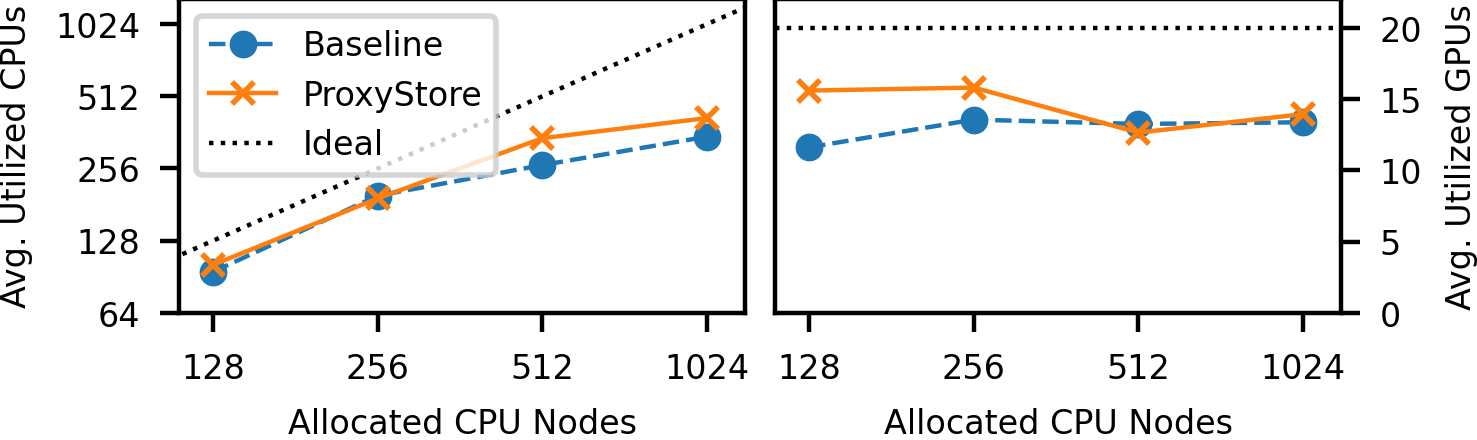

In [4]:
MARKERS = ('o', 'x')
LINES = ('--', '-')
cmap = plt.get_cmap()

fig, axs = plt.subplots(1, 2, sharex=True)

DROP_EIGHT = True

for i, (config, tasks) in enumerate(DATA.items()):
    for j, (system, utils) in enumerate(tasks.items()):
        # utils = [u * 100 for u in utils]
        if DROP_EIGHT:
            utils = utils[1:]
        x = NODES[int(DROP_EIGHT):int(DROP_EIGHT)+len(utils)]
        
        if system == 'CPU':
            y = [u * x[k] for k, u in enumerate(utils)]
        else:
            y = [u * 20 for u in utils]
        
        axs[j].plot(
            x,
            y,
            linestyle=LINES[i],
            marker=MARKERS[i],
            # color=cmap(j),
            label=config,
        )

        axs[j].set_xlabel('Allocated CPU Nodes')


axs[0].set_ylabel('Avg. Utilized CPUs')
axs[0].set_xscale('log', base=2)
axs[0].set_yscale('log', base=2)
axs[0].set_xticks(NODES)
axs[0].set_yticks([64, 128, 256, 512, 1024])
for axis in [axs[0].xaxis, axs[0].yaxis]:
    axis.set_major_formatter(ScalarFormatter())
axs[0].plot((0, 2048), (0, 2048), color='black', linestyle = ':', label='Ideal')
axs[0].set_xlim([111 if DROP_EIGHT else 6, 1200])
axs[0].set_ylim([64 if DROP_EIGHT else 6, 1300])

axs[1].set_ylabel('Avg. Utilized GPUs')
axs[1].axhline(y=20, color='black', linestyle = ':', label='Ideal')
axs[1].set_yticks([0, 5, 10, 15, 20])
axs[1].set_ylim([0, 22])
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

axs[0].legend(loc='upper left')

fig.tight_layout(w_pad=1)

fig.set_size_inches(3.5, 0.9)
plt.savefig('figures/moldesign-scaling-v2.pdf', pad_inches=0.05)